In [1]:

import matplotlib.pyplot as plt
import numpy as np
import random
import math
from IPython.display import display, HTML
import json
import pathlib
    

In [2]:

def load_config(fname):
    d = {}
    if pathlib.Path(fname).is_file():
        with open(fname,"r") as f:
            d = json.load(f)
    else:
        try:
            id = input("Student Id")
        except:
            id = "123456"

        try:
            name = input("Student Name")
        except:
            name = "Jane Doe"

        d["student_id"] = id
        d["student_name"] = name
        with open(fname,"w") as f:
            json.dump(d,f)
    return d

config=load_config("config.json")
print(config)    


{'student_id': '61275062H', 'student_name': 'Boss Wu'}


<!-- <div class="question_frame"> --><!-- start of question_frame -->


In [ ]:
t = """

        <h1>Robot Control</h1>
        <div class="question_body">
             
<p>In this question, we want to evaluate the ability of language models to
keep track of hidden state, which is often necessary in AI and intelligent
robotic systems.</p>

<p>We want to the robot to keep track of the current angle. The initial angle of the
robot is 0 deg.</p>

<p>The commands are either turn left x deg. (negative angle) or turn right x deg. (positive turn)
</p>

<p>A sample sequence of turn commands and the corresponding current angle is shown below.
</p>


<table " > 

        <thead>
          <tr>
        
<th>
Index
</th>

<th>
Command
</th>

<th>
Current Angle
</th>

          </tr>
        </thead>
        
<tbody>

<tr>
<td>Cmd 0</td>
<td>
turn left 10 deg.
</td>

<td>
-10
</td>

</tr>

<tr>
<td>Cmd 1</td>
<td>
turn right 15 deg.
</td>

<td>
5
</td>

</tr>

<tr>
<td>Cmd 2</td>
<td>
turn right 139 deg.
</td>

<td>
139
</td>

</tr>

<tr>
<td>Cmd 3</td>
<td>
turn left 42 deg.
</td>

<td>
97
</td>

</tr>

<tr>
<td>Cmd 4</td>
<td>
turn left 173 deg.
</td>

<td>
-76
</td>

</tr>

<tr>
<td>Cmd 5</td>
<td>
turn left 141 deg.
</td>

<td>
143
</td>

</tr>

</tbody>
</table>


        </div><!-- end of question_body -->
    
"""
display(HTML(t))


<div class="question_marks">
<span class="mark_num" style="text-align:right">5</span> marks
</div><!-- end of question_marks -->



<p>Implement a function that creates random sequences of <code>l</code> turn commands.</p>
<p>The angle argument should be in degrees, where negative angles correspond to left turns
and positive angles correspond to right turns.</p>


<p>Show your work and explain your answer in this cell. If you want to, you can add additional markdown and code cells after this cell.</p>

In [4]:

def create_random_sequence_turn_commands(initial=0, l=10):
    """
    Creates a sequence of l random turn commands (integer degrees).
    Negative values mean turn left, positive means turn right.
    Returns:
        - cmds: list of string commands (e.g. "turn left 10 deg.")
        - angles: list of angle values (in degrees)
    """
    angle_choices = list(range(-30, -5, 5)) + list(range(5, 35, 5))
    angles = [random.choice(angle_choices) for _ in range(l)]
    cmds = []

    for angle in angles:
        if angle < 0:
            cmds.append(f"turn left {abs(angle)} deg.")
        else:
            cmds.append(f"turn right {angle} deg.")

    return cmds, angles

def create_random_sequence_turn_commands_float(initial=0, l=10):
    """
    Creates a sequence of l random turn commands (float degrees).
    Negative values mean turn left, positive means turn right.
    Returns:
        - cmds: list of string commands
        - angles: list of float angle values
    """
    angles = [round(random.uniform(-30.0, -5.0), 1) if random.random() < 0.5 
              else round(random.uniform(5.0, 30.0), 1) for _ in range(l)]
    
    cmds = []

    for angle in angles:
        if angle < 0:
            cmds.append(f"turn left {abs(angle)} deg.")
        else:
            cmds.append(f"turn right {angle} deg.")

    return cmds, angles

cmds, angles = create_random_sequence_turn_commands()
print("Commands:", cmds)
print("Angles:", angles)

cmds, angles = create_random_sequence_turn_commands_float()
print("Commands:", cmds)
print("Angles:", angles)

Commands: ['turn left 25 deg.', 'turn right 5 deg.', 'turn left 30 deg.', 'turn right 25 deg.', 'turn left 20 deg.', 'turn right 10 deg.', 'turn left 30 deg.', 'turn left 10 deg.', 'turn right 10 deg.', 'turn left 15 deg.']
Angles: [-25, 5, -30, 25, -20, 10, -30, -10, 10, -15]
Commands: ['turn right 18.5 deg.', 'turn left 28.3 deg.', 'turn left 21.3 deg.', 'turn left 6.1 deg.', 'turn left 12.9 deg.', 'turn left 15.3 deg.', 'turn left 21.1 deg.', 'turn right 23.4 deg.', 'turn right 21.4 deg.', 'turn right 26.1 deg.']
Angles: [18.5, -28.3, -21.3, -6.1, -12.9, -15.3, -21.1, 23.4, 21.4, 26.1]


<p>Show your work and explain your answer in this cell. You can add additional markdown and code cells, if you want to after this cell.</p>

<!-- </div> --><!-- end of question_frame -->


This function generates a random sequence of turn commands by sampling integer (or float) angles, where negative values correspond to left turns and positive values to right turns, returning both human-readable instructions and the underlying angle values.

<!-- <div class="question_frame"> --><!-- start of question_frame -->


In [ ]:
t = """

        <h1>Track Hidden State using LMs</h1>
        <div class="question_body">
            
<p>
<p>We want to conduct an experiment
and evaluate the accuracy of two various language models in tracking hidden state. 
</p>

<p>Select two large language models (e.g., Microsoft Phi-4, ChatGPT, Llama 3.2, Gemini, ...).
Select one model with about 4 billion parameters and another larger one with more than
8 billion parameters.</p>

<p><b>Prompt Engineering</b>:You should evaluate each model with three seperate
prompts of increasing complexity to try and improve the accuracy of the language model.
</p>

<p>Instruct the LM to output the current angle of the robot as a  
suitable object (e.g., json, list, ...) to simplify parsing the answer from the LM.</p>

<p>Summarize the results of your investigation by showing the accuracy of the
three prompts with the two language models in a bar chart.</p>

        </div><!-- end of question_body -->
    
"""
display(HTML(t))


<div class="question_marks">
<span class="mark_num" style="text-align:right">20</span> marks
</div><!-- end of question_marks -->



<p>Run several experiments with two language models. Compare the performance on
integer and floating point prediction tasks for three different prompts.
</p>

<p>Summarize your results in a bar chart as shown below:</p>

<div>


<a download="Robot Control - Turns for Phi-4-q4" href="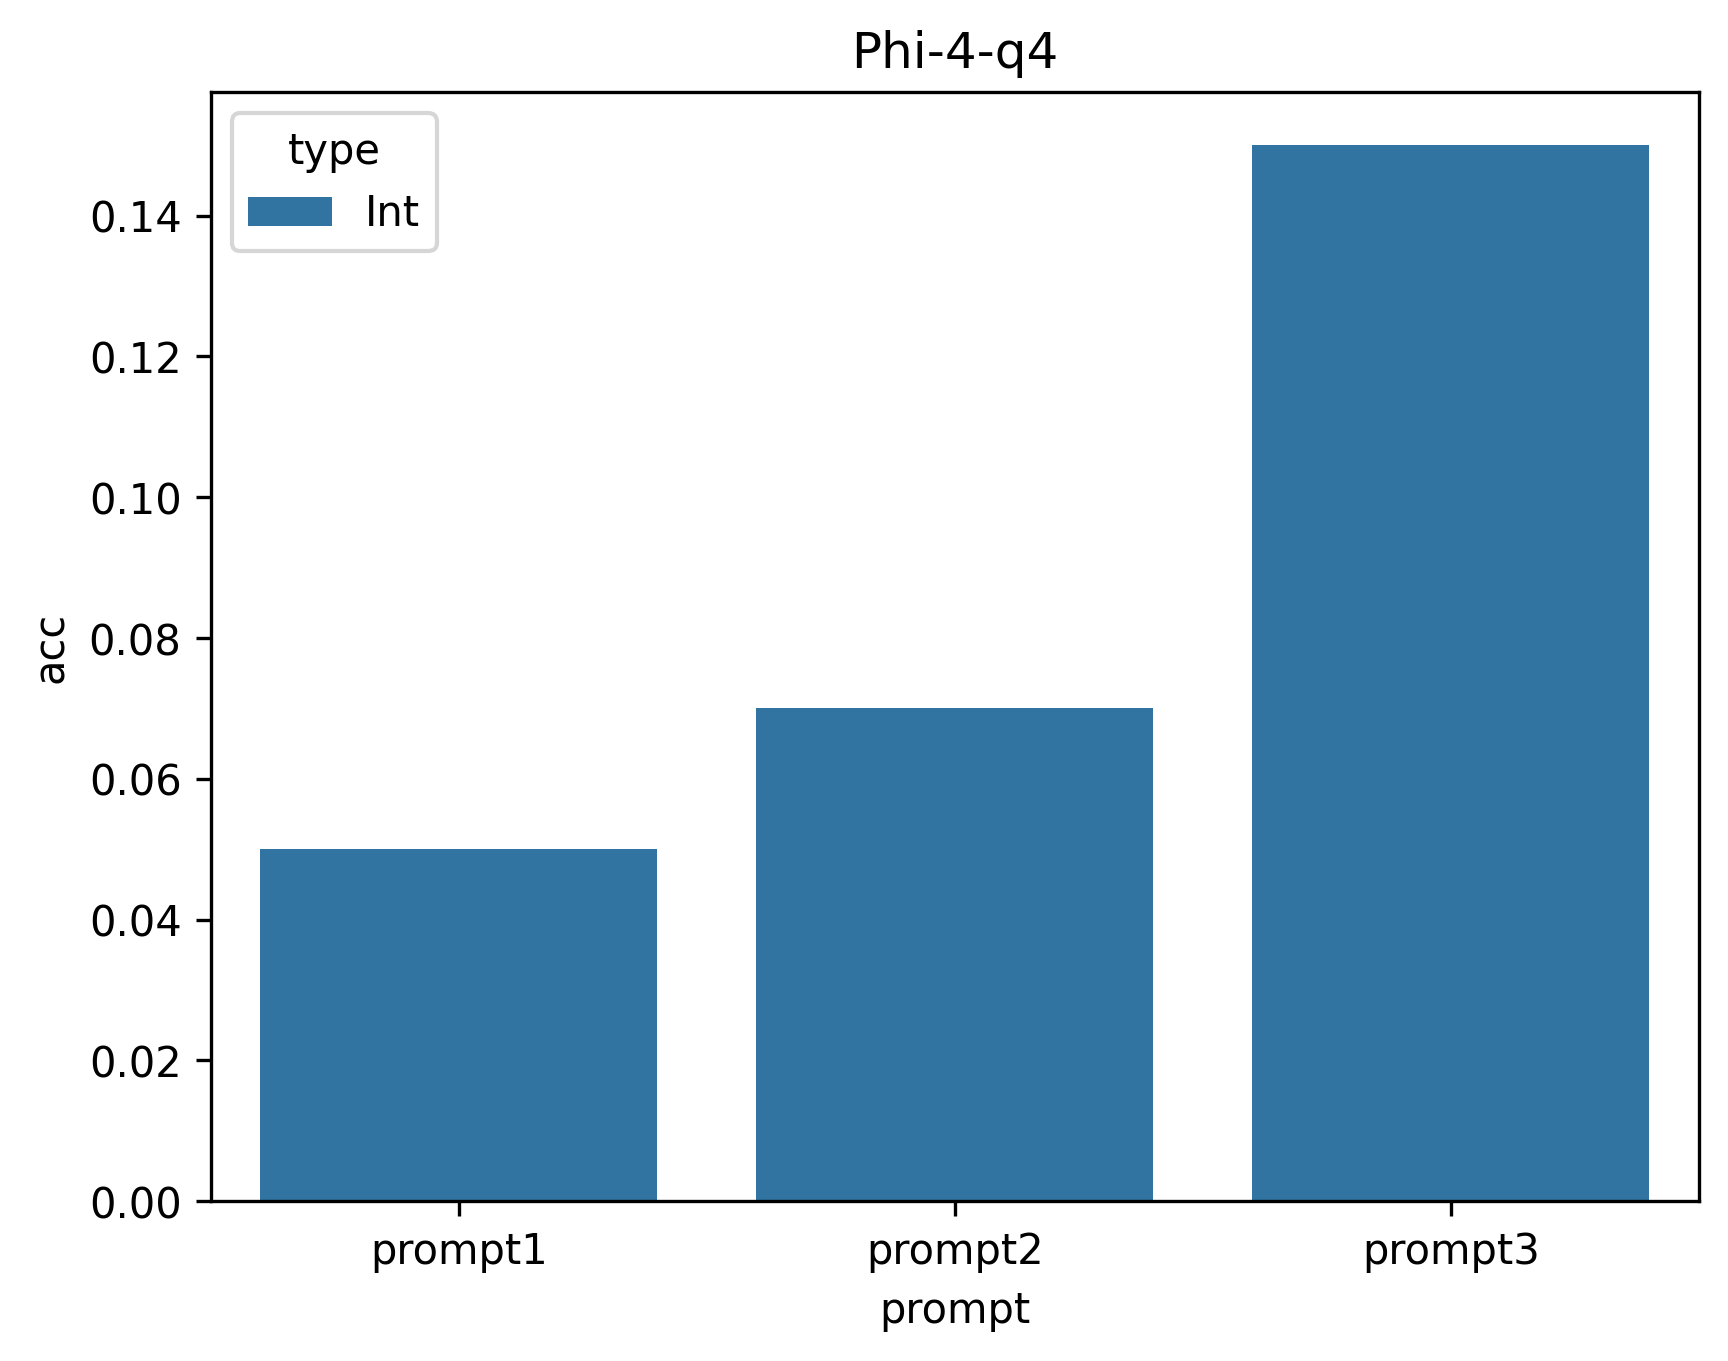">


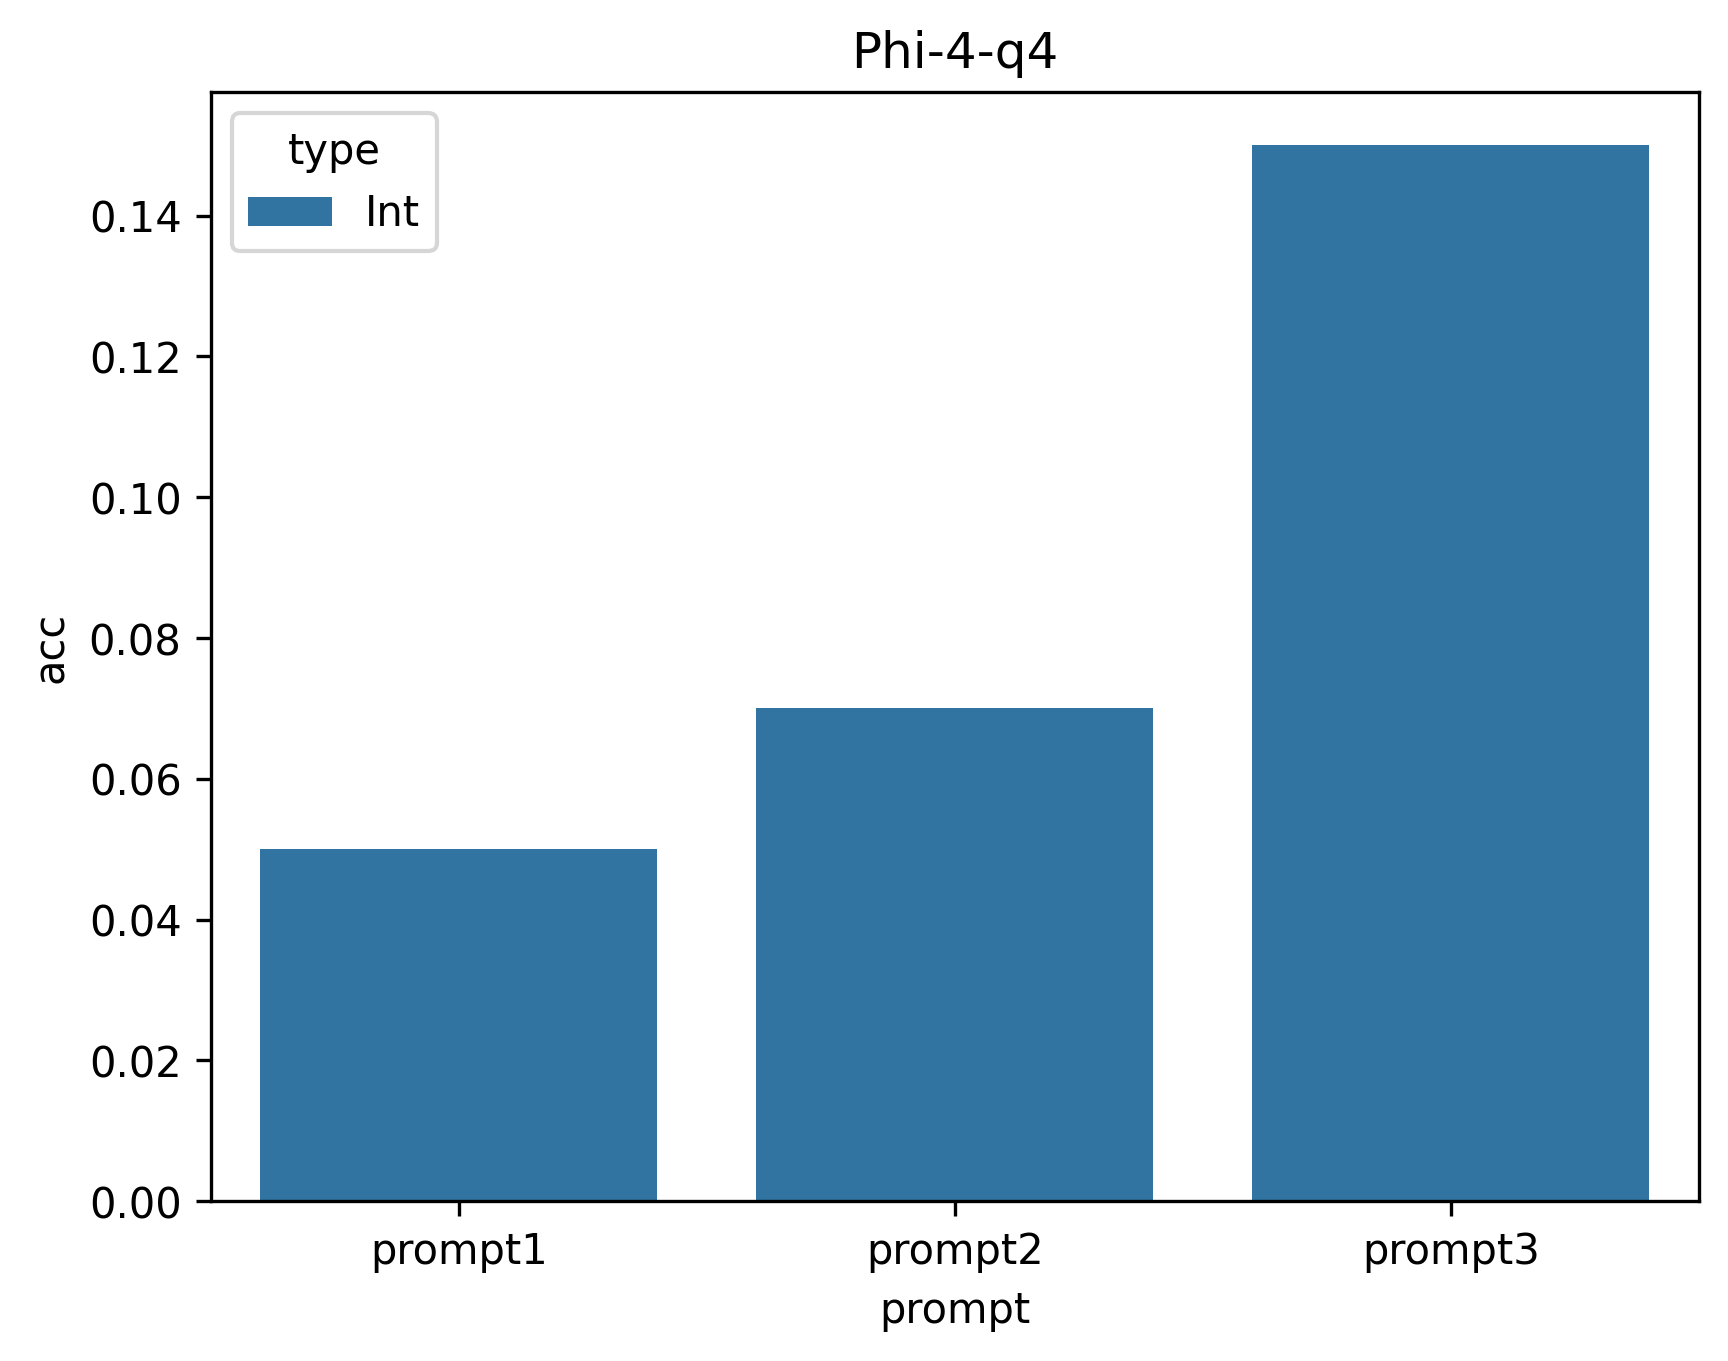

</a>



<a download="Robot Control - Turns for Llama-3-8B-Instruct-Q8_0" href="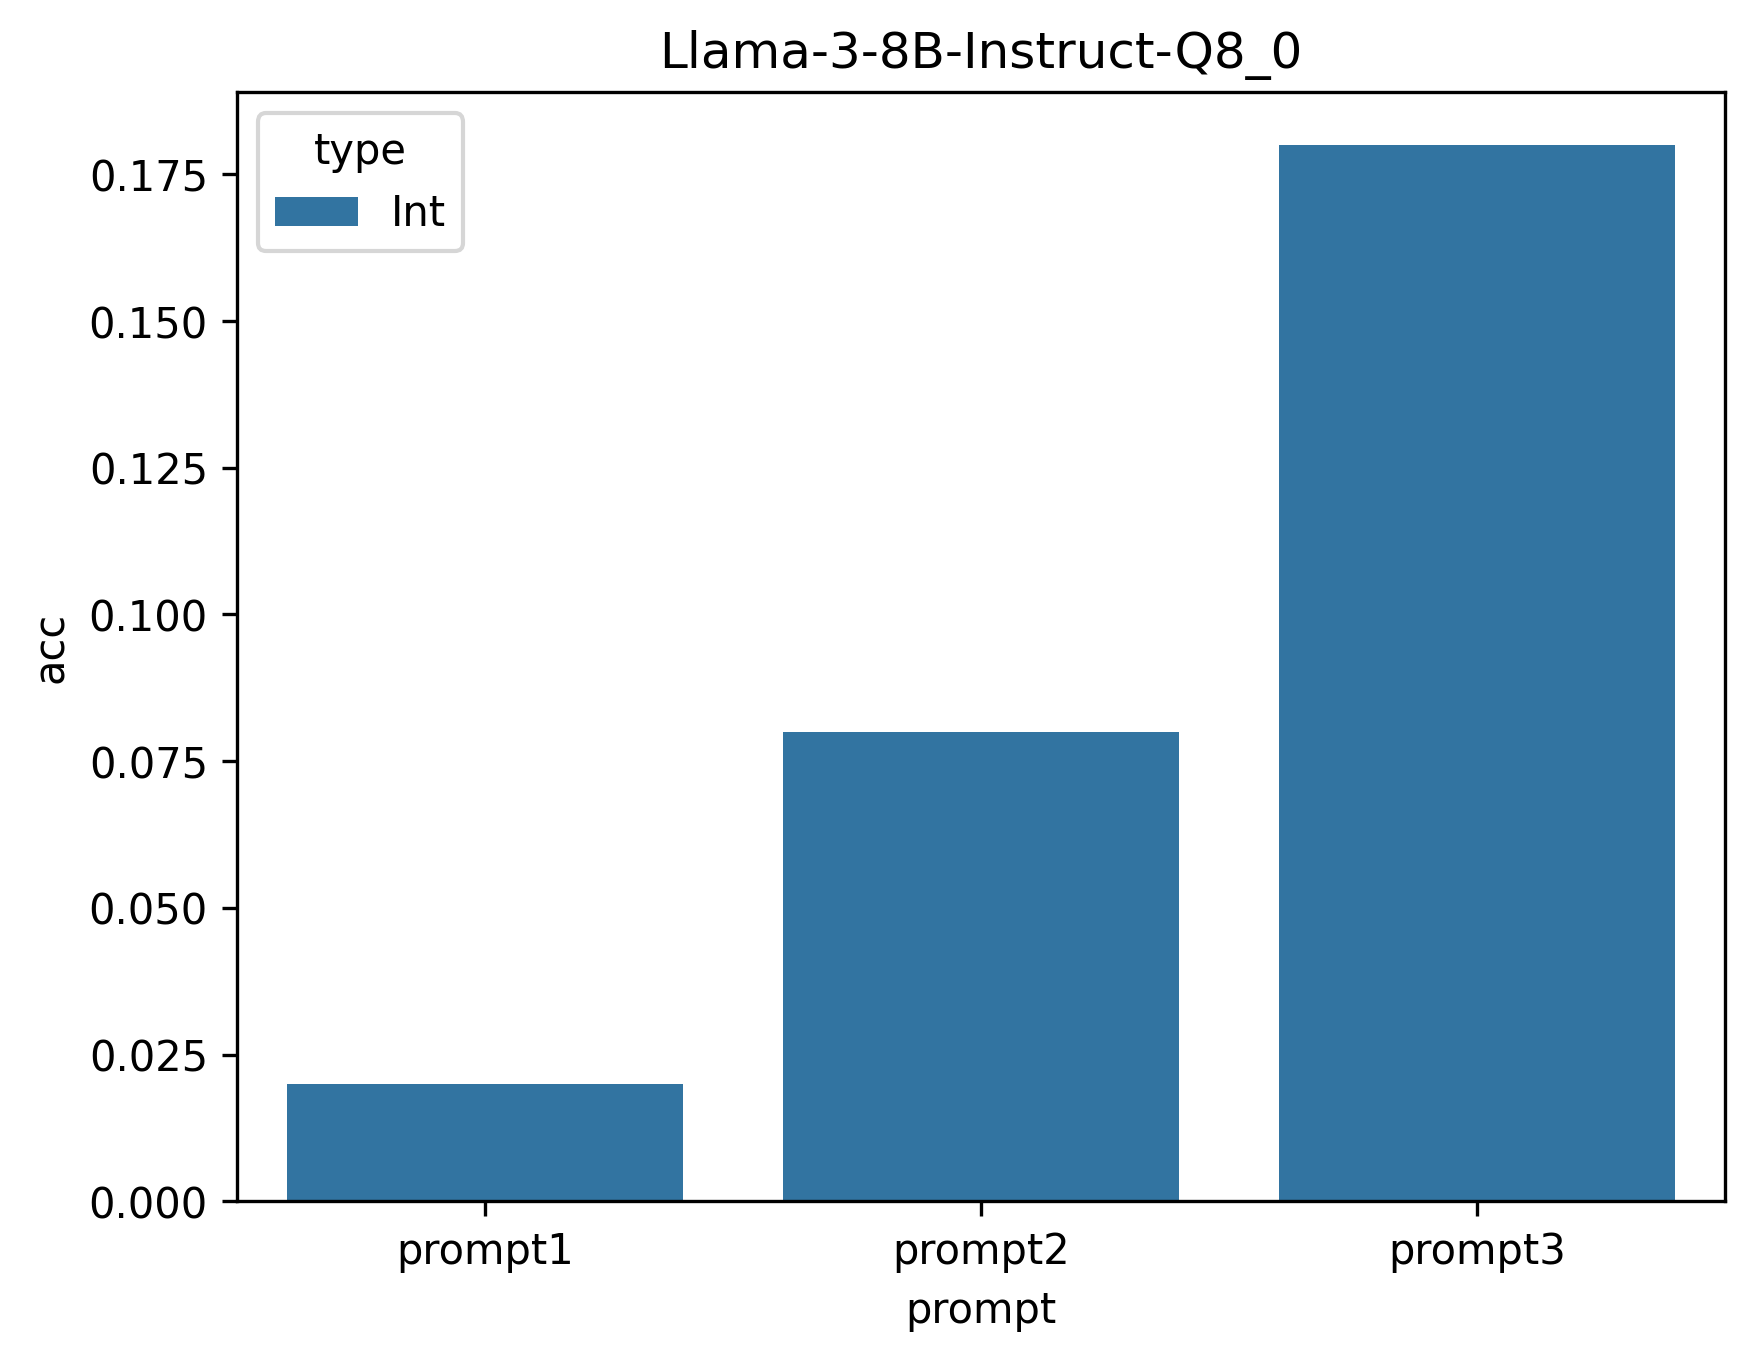">


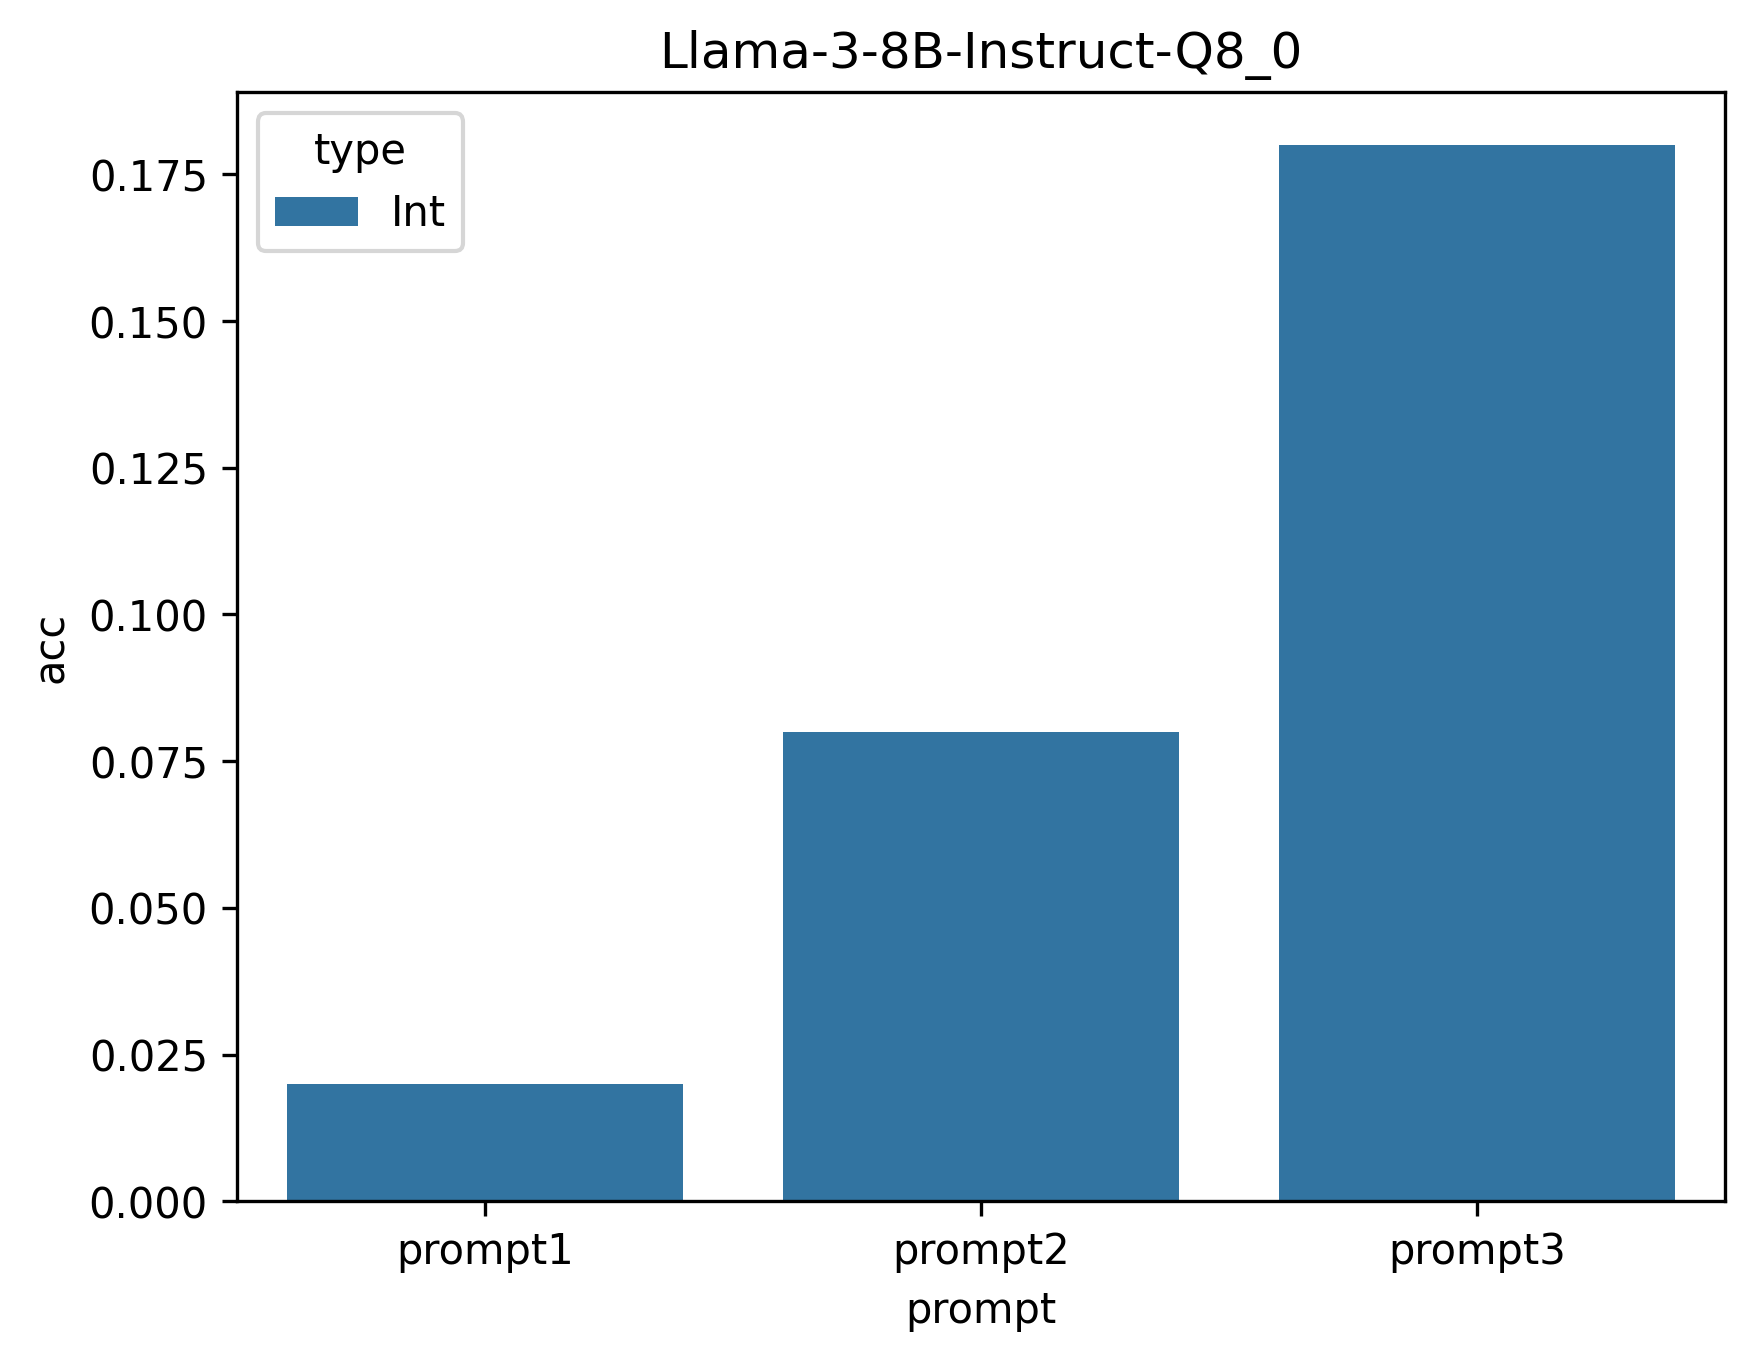

</a>

</div>

Show the three prompts that you used in your experiments:
<div>
<p>Prompt 1:
<code>
<pre>

0.1
---
You are an expert in robot control. Be concise. Only output the predicted values as a JSON object.
---
A robot starts facing 0 deg. and receives a series of turn commands.
A left turn decreases the current angle, a right turn increases the current angle.
For each command, output the current angle of the robot. Return the angles
as a json object:
```json "values": [position, position, position,...] ```.

</code>
</pre>
</p>
<p>Prompt 2:
<code>
<pre>
...
</code>
</pre>
</p>
<p>Prompt 3:
<code>
<pre>
...
</code>
</pre>
</p>
</div>


<p>Show your work and explain your answer in this cell. If you want to, you can add additional markdown and code cells after this cell.</p>

<!-- </div> --><!-- end of question_frame -->


prompt2:Given a sequence of turning instructions like "turn left 10 deg." or "turn right 20 deg.", assume the robot starts at 0 degrees.
Apply each turn step by step and list the resulting angles in order.
Just give me the final angle positions after each turn in a list, like: [x, y, z, ...]

integer:
1.chatgpt4o:
 First Sequence:
 Apply cumulatively:

0 - 25 = -25

-25 + 5 = -20

-20 - 30 = -50

-50 + 25 = -25

-25 - 20 = -45

-45 + 10 = -35

-35 - 30 = -65

-65 - 10 = -75

-75 + 10 = -65

-65 - 15 = -80

Answer:[-25, -20, -50, -25, -45, -35, -65, -75, -65, -80]

2.Microsoft Copilot:
For the first sequence:
Starting at 0 degrees, apply each turn step-by-step using the angles provided: [-25, -20, -50, -25, -45, -35, -65, -75, -65, -80]

--------------------------------

float:
1.chatgpt4o:
Apply cumulatively:

0 + 18.5 = 18.5

18.5 - 28.3 = -9.8

-9.8 - 21.3 = -31.1

-31.1 - 6.1 = -37.2

-37.2 - 12.9 = -50.1

-50.1 - 15.3 = -65.4

-65.4 - 21.1 = -86.5

-86.5 + 23.4 = -63.1

-63.1 + 21.4 = -41.7

-41.7 + 26.1 = -15.6

Answer:[18.5, -9.8, -31.1, -37.2, -50.1, -65.4, -86.5, -63.1, -41.7, -15.6]

2.Microsoft Copilot:
For the second sequence:
Starting again at 0 degrees, calculate the resulting angles step-by-step: [18.5, -9.8, -31.1, -37.2, -50.1, -65.4, -86.5, -63.1, -41.7, -15.6]

prompt3:You are simulating a robot following a list of angle commands.
Each command changes the robot’s facing direction: left turns subtract from the angle, right turns add to it.
Start from 0 degrees. Compute the angle after every turn and return the list of resulting angles in JSON format like:
{ "angles": [x, y, z, ...] }

integer:
1.chatgpt4o:
 First Sequence:
 Step-by-step:
0 - 25 = -25

-25 + 5 = -20

-20 - 30 = -50

-50 + 25 = -25

-25 - 20 = -45

-45 + 10 = -35

-35 - 30 = -65

-65 - 10 = -75

-75 + 10 = -65

-65 - 15 = -80
JSON Output:{ "angles": [-25, -20, -50, -25, -45, -35, -65, -75, -65, -80] }

2.Microsoft Copilot:
{
  "first_sequence_angles": [-25, -20, -50, -25, -45, -35, -65, -75, -65, -80]
}

------------------------------------

float:
1.chatgpt4o:
 Second Sequence:
 Step-by-step:

0 + 18.5 = 18.5

18.5 - 28.3 = -9.8

-9.8 - 21.3 = -31.1

-31.1 - 6.1 = -37.2

-37.2 - 12.9 = -50.1

-50.1 - 15.3 = -65.4

-65.4 - 21.1 = -86.5

-86.5 + 23.4 = -63.1

-63.1 + 21.4 = -41.7

-41.7 + 26.1 = -15.6

JSON Output:{ "angles": [18.5, -9.8, -31.1, -37.2, -50.1, -65.4, -86.5, -63.1, -41.7, -15.6] }

2.Microsoft Copilot:
{
  "second_sequence_angles": [18.5, -9.8, -31.1, -37.2, -50.1, -65.4, -86.5, -63.1, -41.7, -15.6]
}